In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial

## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

### Задача 1

Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [11]:
salaries = pd.Series([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [17]:
mean_user = np.sum(salaries) / len(salaries)
mean_func = salaries.mean()
print(mean_user)
print(mean_func)


65.3
65.3


In [24]:
std_user = np.sqrt((np.sum((salaries - mean_user) ** 2)) / len(salaries))
std_func = salaries.std(ddof=0)

print(std_user)
print(std_func)

30.823854398825596
30.823854398825596


In [25]:
var_user_biased = (np.sum((salaries - mean_user) ** 2)) / len(salaries)
var_user_unbiased = (np.sum((salaries - mean_user) ** 2)) / (len(salaries) - 1)

var_func_biased = salaries.var(ddof=0)
var_func_unbiased = salaries.var(ddof=1)

print(var_user_biased, var_func_biased, var_user_unbiased, var_func_unbiased)

950.11 950.11 1000.1157894736842 1000.1157894736842


### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [28]:
quartiles = salaries.quantile([0.25, 0.75])
print(quartiles)

0.25    42.0
0.75    81.0
dtype: float64


In [34]:
IQR = quartiles[0.75] - quartiles[0.25]
IQR

39.0

{'whiskers': [<matplotlib.lines.Line2D at 0x11f815ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x11f8ec470>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f8dfa20>],
 'medians': [<matplotlib.lines.Line2D at 0x11f8ecb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f8ece48>],
 'means': []}

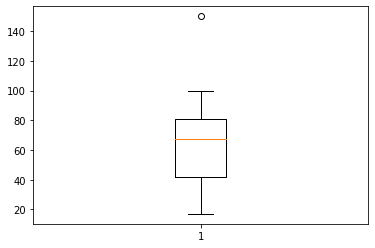

In [36]:
plt.boxplot(salaries)

In [37]:
lower_bound = quartiles[0.25] - 1.5 * IQR
lower_bound

-16.5

In [38]:
upper_bound = quartiles[0.75] + 1.5 * IQR
upper_bound

139.5

In [40]:
salaries.sort_values()

9      17
11     24
7      25
10     30
5      33
6      45
13     55
12     57
8      65
16     65
14     70
2      75
15     75
3      77
1      80
17     84
4      89
18     90
0     100
19    150
dtype: int64

В вы борке только один выброс равный 150

### Задача 3

Для распределения Пуассона с параметром a = 5 найти теоретические (т.е. используя закон распределения, а не выборку) мат. ожидание, моду и медиану.

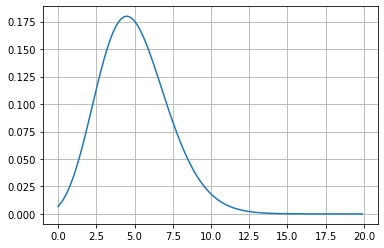

In [96]:
t = np.arange(0, 20, 0.1)
d = np.exp(-5)*np.power(5, t)/factorial(t)

plt.plot(t, d)
plt.grid()
plt.show()

$$
\begin{array}{l}{P(k, 5)=\frac{5^{k} \exp (-5)}{k !}} \\ {k=0,1, \ldots \infty}\end{array}
$$

Не понял задание. Теоретически, все три велечины равны в данном случае "а", т.е. 5 (Нужны были теоретеческие выкладки?). График сдвинулся, вероятно из-за расчетов факториалов от дробных чисел, его нельзя считать достоверным. Построить правильно не удалось.

### Задача 4

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Пусть событие А - студент сдал сессию, событие В1 - студент учится на факультет А, событие В2 - студент учиться на факультете В, событие В3 - студент учиться на факультете С. Всего студентов - n. Тогда на факультете С - n/2, а на факультетах А и В - n/4.

Тогда $$P(B_1) = P(B_2) = 0.25$$ $$P(B_3) = 0.5$$ 
$$
P(A)=P\left(B_{1}\right) \cdot P_{B_{1}}(A)+P\left(B_{2}\right) \cdot P_{B_{2}}(A)+P\left(B_{3}\right) \cdot P_{B_{3}}(A) = 0.25 \cdot 0.8 + 0.25 \cdot 0.7 + 0.5 \cdot 0.9 = 0.825
$$

$$ P(B_1|A) = \frac {0.25 \cdot 0.8}{0.825} = 0.(24) $$

$$ P(B_2|A) = \frac {0.25 \cdot 0.7}{0.825} = 0.(21) $$

$$ P(B_3|A) = \frac {0.5 \cdot 0.9}{0.825} = 0.(54) $$